<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Tapete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ainda é preciso incluir descrição.

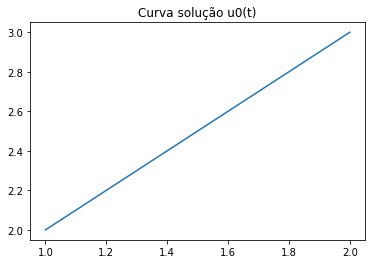

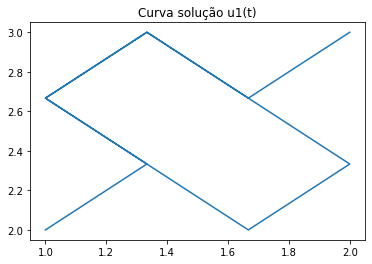

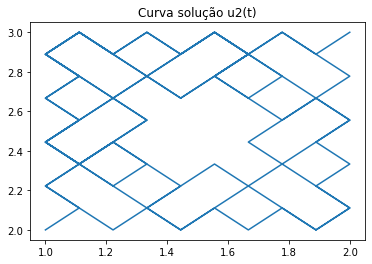

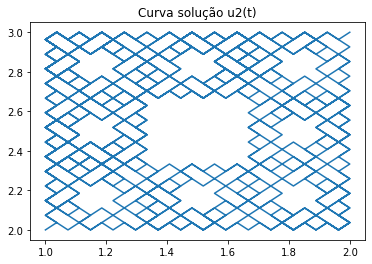

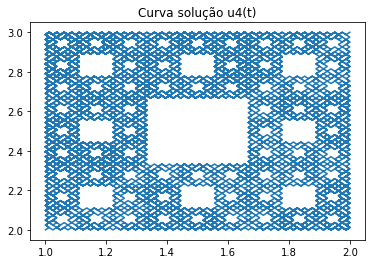

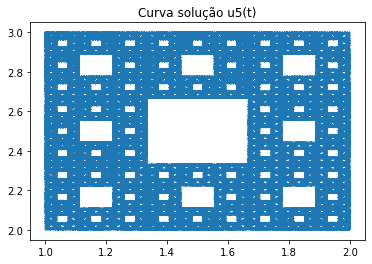

Número de pontos no gráfico 161052


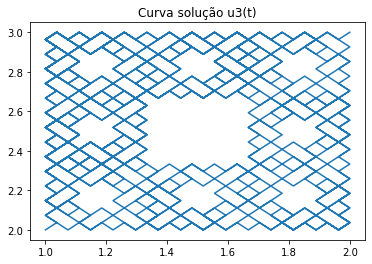

In [1]:
import math

def it(a,b): # Iteração base
  u=[] 
  x=(b[0]-a[0])/3
  u.append(x)
  y=((b[1]-a[1]))/3
  u.append(y)
  t=math.pi/2
  v=[]
  v.append(math.cos(t)*u[0]-math.sin(t)*u[1])
  v.append(math.cos(t)*u[1]+math.sin(t)*u[0])
  p=[]
  p.append(a)
  p.append([p[0][0]+u[0],p[0][1]+u[1]])
  p.append([p[1][0]+v[0],p[1][1]+v[1]])
  p.append([p[2][0]+u[0],p[2][1]+u[1]])
  p.append([p[3][0]-v[0],p[3][1]-v[1]])
  p.append([p[4][0]-v[0],p[4][1]-v[1]])
  p.append([p[5][0]-u[0],p[5][1]-u[1]])
  p.append([p[6][0]+v[0],p[6][1]+v[1]])
  p.append([p[7][0]+v[0],p[7][1]+v[1]])
  p.append([p[8][0]+u[0],p[8][1]+u[1]])
  p.append([p[9][0]-v[0],p[9][1]-v[1]])
  p.append(b)
  return p

w=it([1,2],[2,3]) # Teste da função it(matrix2x2)

from matplotlib import pyplot as plt

x1 = [1,2]
y1 = [2,3]

plt.plot(x1, y1, '-')

plt.title("Curva solução u0(t)")
plt.show()


x1 = []
y1 = []

for i in range(0,len(w)):
  x1.append(w[i][0])
  y1.append(w[i][1])

plt.plot(x1, y1, '-')

plt.title("Curva solução u1(t)")
plt.show()

def Sierpinski(a,b,m): # Replicação da iteração base, a e b são vetores com duas coord.
   z=[]
   z.append(a)
   z.append(b)
   for i in range(0,m):
     q=[]
     q.append(a)
     for j in range(0,len(z)-1):
       qa=it(z[j],z[j+1])
       for l in range(1,len(qa)):
         q.append(qa[l])
     z=q
   return z

w=Sierpinski([1,2],[2,3],2)

x2 = []
y2 = []

for i in range(0,len(w)):
  x2.append(w[i][0])
  y2.append(w[i][1])

plt.plot(x2, y2, '-')

plt.title("Curva solução u2(t)")
plt.show()

w=Sierpinski([1,2],[2,3],3)

x2 = []
y2 = []

for i in range(0,len(w)):
  x2.append(w[i][0])
  y2.append(w[i][1])

plt.plot(x2, y2, '-')

plt.title("Curva solução u2(t)")
plt.show()
w=Sierpinski([1,2],[2,3],4)

x2 = []
y2 = []

for i in range(0,len(w)):
  x2.append(w[i][0])
  y2.append(w[i][1])

plt.plot(x2, y2, '-')

plt.title("Curva solução u4(t)")
plt.show()

w=Sierpinski([1,2],[2,3],5)

x2 = []
y2 = []

for i in range(0,len(w)):
  x2.append(w[i][0])
  y2.append(w[i][1])

plt.plot(x2, y2, '-')

plt.title("Curva solução u5(t)")
plt.show()

print("Número de pontos no gráfico",len(w))

pot=2
w=Sierpinski([1,2],[2,3],pot+1)

x3 = []
y3 = []

for i in range(0,len(w)):
  x3.append(w[i][0])
  y3.append(w[i][1])

plt.plot(x3, y3, '-')

plt.title("Curva solução u3(t)")
plt.show() 

Para visualizar animação clique no link Open in Colab no início da página.

In [ ]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
line_plotted = lines_plotted[0]
 
plt.xlim(1,2) 
 
plt.ylim(2,3)  

# function takes frame as an input
def AnimationFunction(i):
  if (11^pot)*i<len(w): 
    plt.plot(x3[:(11^pot)*i],y3[:(11^pot)*i])
  elif (11^pot)*i==len(w):      
    plt.plot(x3,y3)
  else:      
    plt.plot(x2,y2)
     
anim_created = FuncAnimation(Figure, AnimationFunction, frames=math.trunc(len(w)/(11^pot))+7, interval=50)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()